In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os
import re

In [15]:
dimp_dir = os.path.abspath('dimp')
OTB100 = 'C:\\Users\\alvis\\Documents\\Thesis\\pysot\\testing_dataset\\OTB100'

In [33]:
dimp_out = set(os.listdir(dimp_dir))
dimp_out = set(filter(lambda x: x.split('.')[1]=='txt' and '_time' not in x, dimp_out))

In [5]:
OCC = [
    'Basketball',
    'Biker',
    'Bolt',
    'Box',
    'CarScale',
    'ClifBar',
    'David',
    'DragonBaby',
    'Dudek',
    'Football ',
    'Freeman4 ',
    'Girl ',
    'Human3 ',
    'Human4 ',
    'Ironman ',
    'Jump ',
    'Liquor ',
    'Matrix ',
    'Panda ',
    'RedTeam ',
    'Skating1 ',
    'Skating2 ',
    'Soccer ',
    'Tiger ',
    'Walking ',
    'Walking2',
    'Woman',
    'Bird2 ',
    'Coke ',
    'Coupon ',
    'David3 ',
    'Doll ',
    'FaceOcc1 ',
    'FaceOcc2 ',
    'Girl2 ',
    'Human5',
    'Human7 ',
    'Jogging ',
    'KiteSurf ',
    'Lemming ',
    'Rubik',
    'Singer1 ',
    'Subway ',
    'Suv ',
    'Tiger1 ',
    'Trans',
]

In [6]:
Deformation = [
    'Basketball',
    'Bird1', 
    'Bird2', 
    'BlurBody', 
    'Bolt', 
    'Bolt2', 
    'Couple', 
    'Crossing', 
    'Crowds', 
    'Dancer', 
    'Dancer2', 
    'David', 
    'David3', 
    'Diving', 
    'Dog', 
    'Dudek', 
    'FleetFace', 
    'Girl2', 
    'Gym', 
    'Human3', 
    'Human4.2', 
    'Human5', 
    'Human6', 
    'Human7', 
    'Human8', 
    'Human9', 
    'Jogging.1', 
    'Jogging.2', 
    'Jump', 
    'Mhyang',
    'Panda', 
    'Singer2', 
    'Skater', 
    'Skater2', 
    'Skating1', 
    'Skating2.1', 
    'Skating2.2', 
    'Skiing', 
    'Subway', 
    'Tiger1', 
    'Tiger2', 
    'Trans', 
    'Walking', 
    'Woman'
]

In [7]:
metrics = {
    'OCC': OCC,
    'Deformation': Deformation
}

In [8]:
def bb_intersection_over_union(boxA, boxB):
    # print(boxA, boxB)
    # make sure all the values are intergers
    for i in range(0, 4):
        boxA[i] = int(boxA[i])
        boxB[i] = int(boxB[i])-1

    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou


In [9]:
def transform_gtbox(gt_bbox):
    gt_bbox = (gt_bbox[0], gt_bbox[1],
        gt_bbox[0]+gt_bbox[2], gt_bbox[1]+gt_bbox[3])
    return list(gt_bbox)

In [10]:
def smooth(v):
    lenght = 500
    div = int(v.shape[0]/500)
    v = v[:div * 500]
    return np.mean(v.reshape(-1, div), axis =1)

In [11]:
def append_reverse_np(item, times):
    tmp = np.array([item if i % 2 == 0 else list(reversed(item)) for i in range(times)])
    return tmp.reshape(item.shape[0]*times, 4)

In [12]:
def convert_center_to_bbb(bboxes):
    p1x = int(bboxes[0] - 1)
    p1y = int(bboxes[1] - 1)
    p2x = int(bboxes[0] + bboxes[2] - 1)
    p2y = int(bboxes[1] + bboxes[3] - 1)
    # return (p1x, p1y), (p2x, p2y)
    return np.array([p1x, p1y, p2x, p2y])


In [34]:
metrics_result = {}
for k, v in metrics.items():
    metrics_result[k] = []

dimp_acc = []
for filename in dimp_out:
    # print(filename)
    try:
        sample = re.search('(.*)-normal-.txt', filename).group(1)
    except:
        continue
    print(f"{filename}: {sample}")

    try:
        try:
            gt_bbox = np.loadtxt(os.path.join(OTB100, sample, 'groundtruth_rect.txt'), delimiter=',')
        except:
            gt_bbox = np.loadtxt(os.path.join(OTB100, sample, 'groundtruth_rect.txt'), delimiter='\t')
    except:
        continue

    dimp_v = np.loadtxt(os.path.join(dimp_dir, filename), delimiter='\t')
    min_dim = dimp_v.shape[0]


    gt_bbox = append_reverse_np(gt_bbox, 40)
    gt_bbox = gt_bbox[:min_dim,:]

    da = []
    for d, gt in zip(dimp_v, gt_bbox):
        # gt = convert_center_to_bbb(gt)
        d = convert_center_to_bbb(d)
        da.append(bb_intersection_over_union(d, convert_center_to_bbb(gt)))

    da = smooth(np.asarray(da))
    dimp_acc.append(da)

    for k, v in metrics_result.items():
        if sample in metrics[k]:
            v.append(da)

Man-normal-.txt: Man
Crossing-normal-.txt: Crossing
Football-normal-.txt: Football
Doll-normal-.txt: Doll
Girl-normal-.txt: Girl
Ironman-normal-.txt: Ironman
Freeman4-normal-.txt: Freeman4
Skating2_2-normal-.txt: Skating2_2
Skiing-normal-.txt: Skiing
Bolt2-normal-.txt: Bolt2
BlurCar1-normal-.txt: BlurCar1
Couple-normal-.txt: Couple
Box-normal-.txt: Box
Boy-normal-.txt: Boy
Human9-normal-.txt: Human9
Car2-normal-.txt: Car2
Tiger2-normal-.txt: Tiger2
Human4_2-normal-.txt: Human4_2
Subway-normal-.txt: Subway
Car24-normal-.txt: Car24
Sylvester-normal-.txt: Sylvester
Board-normal-.txt: Board
CarScale-normal-.txt: CarScale
ClifBar-normal-.txt: ClifBar
BlurFace-normal-.txt: BlurFace
Dog1-normal-.txt: Dog1
RedTeam-normal-.txt: RedTeam
Skater2-normal-.txt: Skater2
Crowds-normal-.txt: Crowds
Woman-normal-.txt: Woman
Liquor-normal-.txt: Liquor
Basketball-normal-.txt: Basketball
Dancer-normal-.txt: Dancer
MotorRolling-normal-.txt: MotorRolling
FleetFace-normal-.txt: FleetFace
Jogging_2-normal-.txt

In [35]:
dimp_acc = np.array(dimp_acc)

for k, v in metrics_result.items():
    metrics_result[k] = np.array(v)

In [36]:
metrics_result['Deformation'].shape

(38, 500)

In [37]:
metrics_result['OCC'].shape


(13, 500)

# Plot of the total dataset


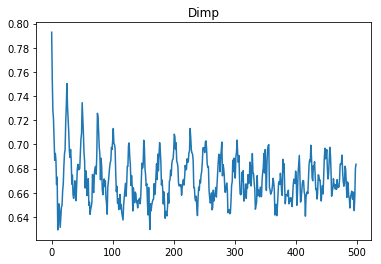

In [38]:
plt.plot(dimp_acc.mean(axis=0))
plt.title('Dimp')
plt.show()

# Plot of OCC subset

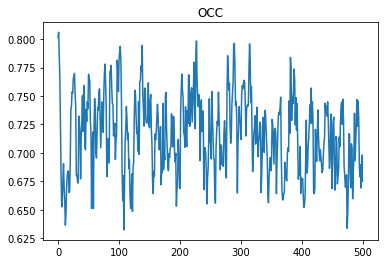

In [39]:
plt.title('OCC')
plt.plot(metrics_result['OCC'].mean(axis=0))
plt.show()

In [18]:
# Plot of deformation subset

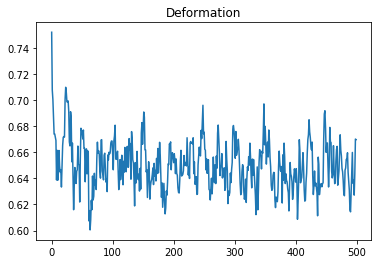

In [40]:
plt.title('Deformation')
plt.plot(metrics_result['Deformation'].mean(axis=0))
plt.show()

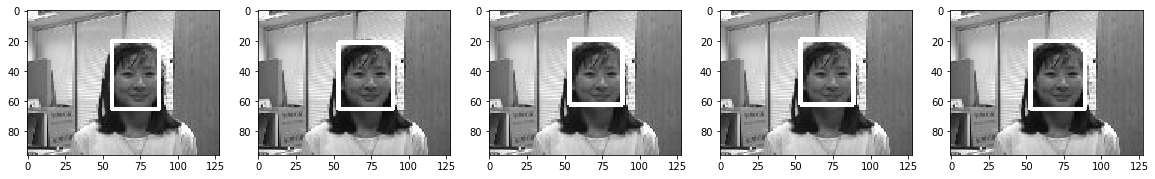

In [69]:
n_images = 500
siam_girl = np.loadtxt(os.path.join(dimp_dir, 'Girl.txt'), delimiter='\t')


girl_path = os.path.join(OTB100, 'Girl', 'img')
img = cv2.imread(os.path.join(girl_path, '0001.jpg'),0)


plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(2,5,i+1)
    siam_img = img.copy()
    r0 = convert_center_to_bbb(siam_girl[2*i*n_images,:]).astype(int)
    cv2.rectangle(siam_img, (r0[0],r0[1]),(r0[2],r0[3]),(255,0,0), 2)
    plt.imshow(siam_img, cmap='gray')

plt.show()

In [46]:

def show_acc_plot(name):

    try:
        gt_bbox = np.loadtxt(os.path.join(OTB100, name, 'groundtruth_rect.txt'), delimiter=',')
    except:
        gt_bbox = np.loadtxt(os.path.join(OTB100, name, 'groundtruth_rect.txt'), delimiter='\t')

    dimp_v = np.loadtxt(os.path.join(dimp_dir, name + '.txt'), delimiter='\t')
    min_dim = dimp_v.shape[0]


    gt_bbox = append_reverse_np(gt_bbox, 40)
    gt_bbox = gt_bbox[:min_dim,:]

    da = []
    for d, gt in zip(dimp_v, gt_bbox):
        # gt = convert_center_to_bbb(gt)
        d = convert_center_to_bbb(d)
        da.append(bb_intersection_over_union(d, convert_center_to_bbb(gt)))

    da = smooth(np.asarray(da))

    plt.title(f'Plot accuracy {name}')
    plt.plot(da)
    plt.show()

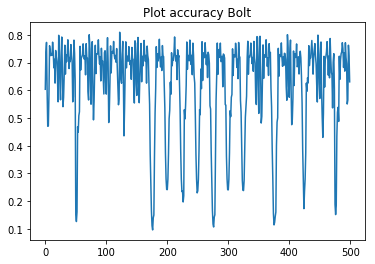

In [50]:
show_acc_plot('Bolt')